<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> Exercício de MAC0209 - Modelagem e Simulação</a> </font>

Rafael Baía Sales - 15484912 (IME-USP)

Rafael dos Santos Lombardi - 15485062 (IME-USP)

***
<font size="5"> EP2 - Mobilidade Pedestre </font>
***

# Setup

In [79]:
# setup aqui

## Depois a gente exporta para o Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

#################

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sideseeing_tools import sideseeing, plot


# Lib

In [80]:
# lib aqui


# edite seu path abaixo:
# def myPath():
#   workDir = '/content/drive/MyDrive/doc/Courses/Modelagem/programas/jupyter/2022/'
#   return(workDir)

# def demoWorkDir():
#   # usa o ponto de montagem do google drive para  ler e salvar dados
#   wd = myPath()
#   csvFile = wd + 'foo.csv'

#   df = pd.read_csv(csvFile, sep = ';')
#   print(df.to_string())

# demoWorkDir()

##################

def plotxyz(ds: pd.core.frame.DataFrame, dimensions: str = "xyz", title: str = None, ylabel: str = None):
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.plot(ds['Time (s)'], ds['x'], label='x')
    if 'y' in dimensions: plt.plot(ds['Time (s)'], ds['y'], label='y')
    if 'z' in dimensions: plt.plot(ds['Time (s)'], ds['z'], label='z')
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return


# Main

In [81]:
mu_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Reta", name="MU_Reta")
mu_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Zigzag", name="MU_Zigzag")
muv_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Reta", name="MUV_Reta")
muv_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Zigzag", name="MUV_Zigzag")

INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.


In [82]:
for sensors in ["sensors1", "sensors3", "sensors6"]:
    print(f"{sensors.capitalize()}:")
    for sensor in mu_reta_ds.sensors[sensors].keys():
        print(f" - {sensor}")
    print()

Sensors1:
 - stk33911 light  non-wakeup
 - lps22hh pressure sensor non-wakeup

Sensors3:
 - lsm6dso lsm6dso accelerometer non-wakeup
 - ak09918 magnetometer
 - lsm6dso lsm6dso gyroscope non-wakeup
 - gravity  non-wakeup
 - linear_acceleration

Sensors6:
 - ak09918 magnetometer-uncalibrated
 - lsm6dso lsm6dso gyroscope-uncalibrated non-wakeup



In [83]:
sample = mu_reta_ds.instances['2-2025-05-22-14-52-08-657']
sample_accel_data = sample.sensors3['linear_acceleration']
sample_accel_data

,Datetime UTC,x,y,z,timestamp_nano,accuracy,name,Time (s)
0,2025-05-22 17:52:08.980,0.000000,0.000000,0.000000,103824959931032,3,linear_acceleration,0.000
1,2025-05-22 17:52:09.176,0.016176,-0.045555,0.194847,103825156857282,3,linear_acceleration,0.196
2,2025-05-22 17:52:09.372,0.079103,0.036078,-0.717660,103825352604678,3,linear_acceleration,0.392
3,2025-05-22 17:52:09.569,0.028462,0.247982,-1.080880,103825549531189,3,linear_acceleration,0.589
4,2025-05-22 17:52:09.765,-0.066309,0.085863,-0.368241,103825745278585,3,linear_acceleration,0.785
...,...,...,...,...,...,...,...,...
439,2025-05-22 17:53:35.013,0.068730,0.323255,0.232731,103910992220020,3,linear_acceleration,86.033
440,2025-05-22 17:53:35.208,-0.046754,0.158084,0.338023,103911187971166,3,linear_acceleration,86.228
441,2025-05-22 17:53:35.405,0.161103,0.047082,-0.074641,103911384685593,3,linear_acceleration,86.425
442,2025-05-22 17:53:35.600,-0.109647,0.105893,-0.165981,103911580651739,3,linear_acceleration,86.620


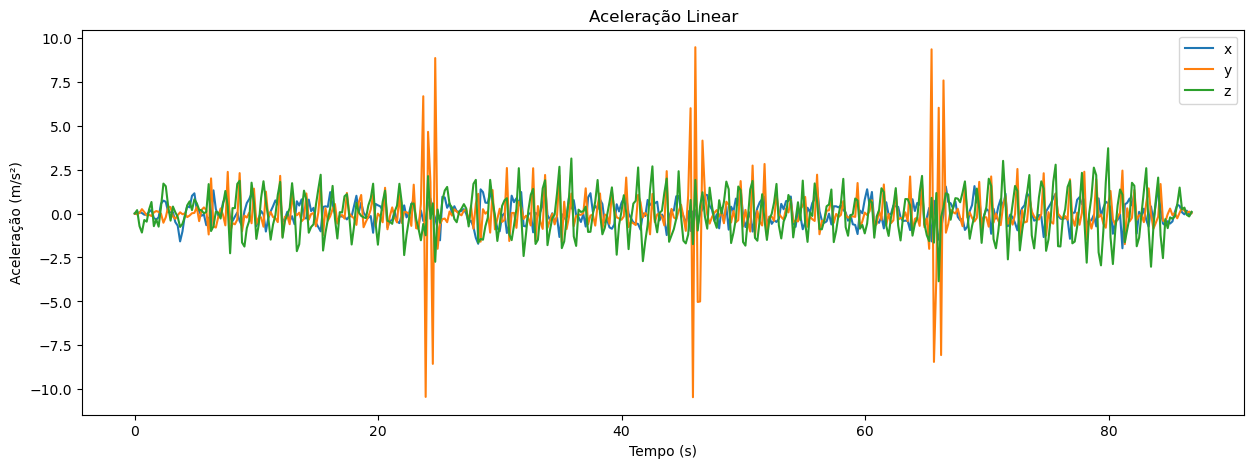

In [84]:
plotxyz(sample_accel_data, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")